# Student Exam Performance Prediction - Logistic Regression

## Dataset Overview
This notebook performs logistic regression to predict student exam performance.

**Goal**: Predict whether a student will pass (1) or fail (0) an exam.

**Features**:
- Study Hours: Number of hours a student spent studying
- Previous Exam Score: Student's score in the previous exam

**Target**: Pass/Fail (binary: 0 for fail, 1 for pass)


## 1. Import Libraries


In [81]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Load and Explore Data


In [82]:
# Load the dataset
df = pd.read_csv('../dataset/student_exam_data_new.csv')

# Basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print()

print("=== DATA TYPES ===")
print(df.dtypes)
print()

print("=== FIRST 5 ROWS ===")
df.head()


=== DATASET OVERVIEW ===
Shape: (500, 3)
Columns: ['Study Hours', 'Previous Exam Score', 'Pass/Fail']

=== DATA TYPES ===
Study Hours            float64
Previous Exam Score    float64
Pass/Fail                int64
dtype: object

=== FIRST 5 ROWS ===


,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [83]:
# Check for missing values
print("=== MISSING VALUES CHECK ===")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

# Check for duplicates
print("\n=== DUPLICATE ROWS CHECK ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Basic statistics
print("\n=== DESCRIPTIVE STATISTICS ===")
df.describe()


=== MISSING VALUES CHECK ===
Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64

Total missing values: 0

=== DUPLICATE ROWS CHECK ===
Number of duplicate rows: 0

=== DESCRIPTIVE STATISTICS ===


,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


## 3. Data Cleansing & Preprocessing


In [84]:
# Create a copy of the data
df_clean = df.copy()

print("=== DATA QUALITY CHECKS ===")

# Check for invalid values
print("Study Hours - Range Check:")
print(f"  Min: {df_clean['Study Hours'].min():.2f}")
print(f"  Max: {df_clean['Study Hours'].max():.2f}")
print(f"  Negative values: {(df_clean['Study Hours'] < 0).sum()}")

print("\nPrevious Exam Score - Range Check:")
print(f"  Min: {df_clean['Previous Exam Score'].min():.2f}")
print(f"  Max: {df_clean['Previous Exam Score'].max():.2f}")

print("\nPass/Fail - Value Check:")
print(f"  Unique values: {sorted(df_clean['Pass/Fail'].unique())}")
print(f"  Value counts:\n{df_clean['Pass/Fail'].value_counts().sort_index()}")

# Check if data is already clean
print("\n=== DATA CLEANING SUMMARY ===")
print("✓ No missing values")
print("✓ No invalid values detected")
print("✓ Binary target variable is correct (0 and 1)")
print("✓ Data is ready for modeling")


=== DATA QUALITY CHECKS ===
Study Hours - Range Check:
  Min: 1.05
  Max: 9.94
  Negative values: 0

Previous Exam Score - Range Check:
  Min: 40.28
  Max: 99.98

Pass/Fail - Value Check:
  Unique values: [0, 1]
  Value counts:
Pass/Fail
0    316
1    184
Name: count, dtype: int64

=== DATA CLEANING SUMMARY ===
✓ No missing values
✓ No invalid values detected
✓ Binary target variable is correct (0 and 1)
✓ Data is ready for modeling


## 4. Data Visualization & Exploration


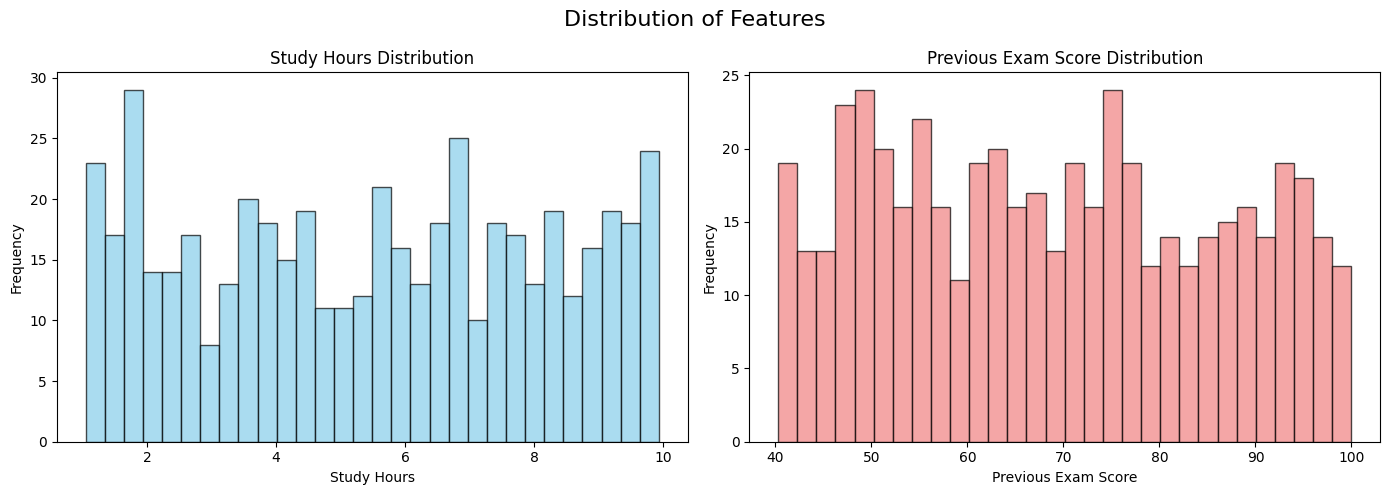

=== FEATURE STATISTICS ===
       Study Hours  Previous Exam Score
count   500.000000           500.000000
mean      5.487055            68.917084
std       2.688196            17.129607
min       1.045554            40.277921
25%       3.171517            53.745955
50%       5.618474            68.309294
75%       7.805124            83.580209
max       9.936683            99.983060


In [85]:
# Distribution of features
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Distribution of Features', fontsize=16)

# Study Hours distribution
axes[0].hist(df_clean['Study Hours'], bins=30, alpha=0.7, edgecolor='black', color='skyblue')
axes[0].set_title('Study Hours Distribution')
axes[0].set_xlabel('Study Hours')
axes[0].set_ylabel('Frequency')

# Previous Exam Score distribution
axes[1].hist(df_clean['Previous Exam Score'], bins=30, alpha=0.7, edgecolor='black', color='lightcoral')
axes[1].set_title('Previous Exam Score Distribution')
axes[1].set_xlabel('Previous Exam Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Statistical summary
print("=== FEATURE STATISTICS ===")
print(df_clean[['Study Hours', 'Previous Exam Score']].describe())


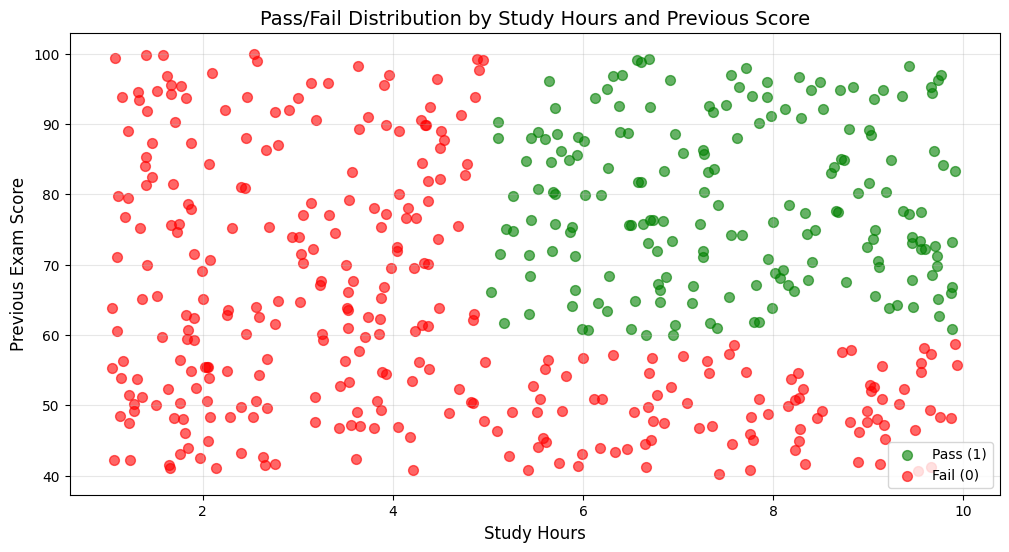

=== PASS/FAIL DISTRIBUTION ===
Passed (1): 184 students (36.8%)
Failed (0): 316 students (63.2%)


In [86]:
# Scatter plot showing pass/fail separation
plt.figure(figsize=(12, 6))

# Separate passed and failed students
passed = df_clean[df_clean['Pass/Fail'] == 1]
failed = df_clean[df_clean['Pass/Fail'] == 0]

plt.scatter(passed['Study Hours'], passed['Previous Exam Score'], 
           color='green', alpha=0.6, label='Pass (1)', s=50)
plt.scatter(failed['Study Hours'], failed['Previous Exam Score'], 
           color='red', alpha=0.6, label='Fail (0)', s=50)

plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Previous Exam Score', fontsize=12)
plt.title('Pass/Fail Distribution by Study Hours and Previous Score', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

print("=== PASS/FAIL DISTRIBUTION ===")
print(f"Passed (1): {passed.shape[0]} students ({passed.shape[0]/len(df_clean)*100:.1f}%)")
print(f"Failed (0): {failed.shape[0]} students ({failed.shape[0]/len(df_clean)*100:.1f}%)")


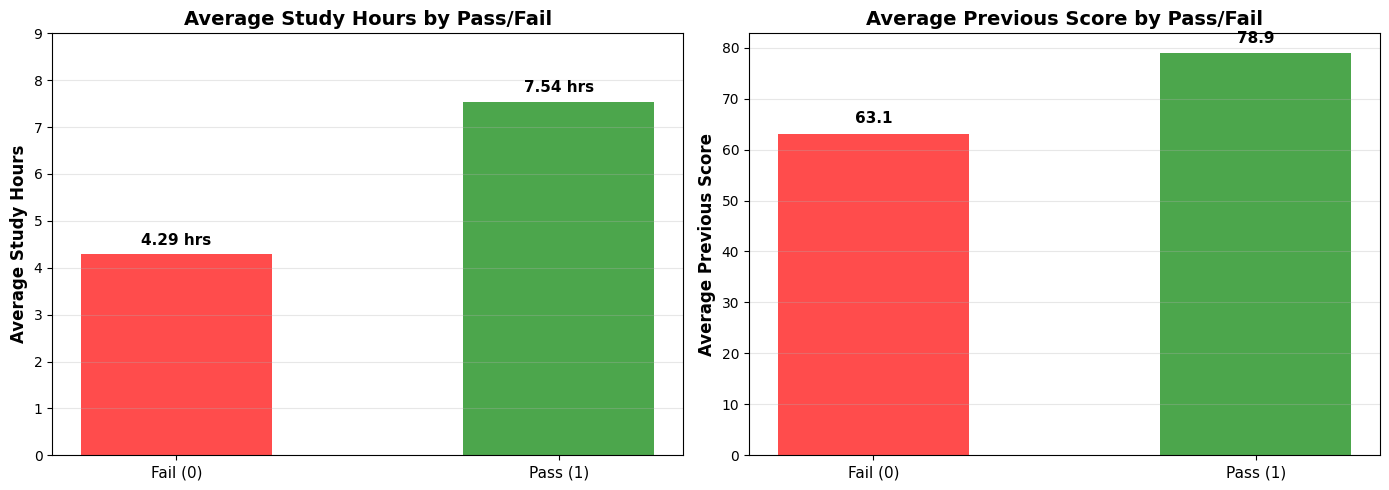

=== KEY INSIGHTS FROM EDA ===

📊 Data Overview:
   • Total students: 500
   • Passed: 184 (36.8%)
   • Failed: 316 (63.2%)

📈 Average Study Hours:
   • Fail (0): 4.29 hours
   • Pass (1): 7.54 hours
   • Difference: 3.25 hours MORE for passers

📈 Average Previous Exam Score:
   • Fail (0): 63.1 points
   • Pass (1): 78.9 points
   • Difference: 15.7 points HIGHER for passers

✅ Conclusion:
   Students who PASS study 3.2 hours more
   Students who PASS scored 15.7 points higher in previous exam


In [87]:
# Simple comparison: Average values for Pass/Fail
plt.figure(figsize=(14, 5))

# Average Study Hours
plt.subplot(1, 2, 1)
avg_hours = df_clean.groupby('Pass/Fail')['Study Hours'].mean()
bars = plt.bar(['Fail (0)', 'Pass (1)'], avg_hours.values, color=['red', 'green'], alpha=0.7, width=0.5)
plt.ylabel('Average Study Hours', fontsize=12, fontweight='bold')
plt.title('Average Study Hours by Pass/Fail', fontsize=14, fontweight='bold')
plt.ylim(0, 9)
for i, v in enumerate(avg_hours.values):
    plt.text(i, v + 0.2, f'{v:.2f} hrs', ha='center', fontsize=11, fontweight='bold')
plt.xticks(fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Average Previous Exam Score
plt.subplot(1, 2, 2)
avg_score = df_clean.groupby('Pass/Fail')['Previous Exam Score'].mean()
bars = plt.bar(['Fail (0)', 'Pass (1)'], avg_score.values, color=['red', 'green'], alpha=0.7, width=0.5)
plt.ylabel('Average Previous Score', fontsize=12, fontweight='bold')
plt.title('Average Previous Score by Pass/Fail', fontsize=14, fontweight='bold')
for i, v in enumerate(avg_score.values):
    plt.text(i, v + 2, f'{v:.1f}', ha='center', fontsize=11, fontweight='bold')
plt.xticks(fontsize=11)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical comparison
print("=== KEY INSIGHTS FROM EDA ===")
print("\n📊 Data Overview:")
print(f"   • Total students: {len(df_clean)}")
print(f"   • Passed: {passed.shape[0]} ({passed.shape[0]/len(df_clean)*100:.1f}%)")
print(f"   • Failed: {failed.shape[0]} ({failed.shape[0]/len(df_clean)*100:.1f}%)")

print("\n📈 Average Study Hours:")
print(f"   • Fail (0): {avg_hours[0]:.2f} hours")
print(f"   • Pass (1): {avg_hours[1]:.2f} hours")
print(f"   • Difference: {avg_hours[1] - avg_hours[0]:.2f} hours MORE for passers")

print("\n📈 Average Previous Exam Score:")
print(f"   • Fail (0): {avg_score[0]:.1f} points")
print(f"   • Pass (1): {avg_score[1]:.1f} points")
print(f"   • Difference: {avg_score[1] - avg_score[0]:.1f} points HIGHER for passers")

print("\n✅ Conclusion:")
print(f"   Students who PASS study {avg_hours[1] - avg_hours[0]:.1f} hours more")
print(f"   Students who PASS scored {avg_score[1] - avg_score[0]:.1f} points higher in previous exam")


### How to Explain the EDA Charts:

**Chart 1: Feature Distributions (Histograms)**
- Shows the spread of Study Hours (1-10 hours) and Previous Exam Score (40-100 points)
- Most students study 5-7 hours on average
- Previous exam scores range from 40-100, with most around 70

**Chart 2: Scatter Plot**  
- **Green dots** = Students who PASSED
- **Red dots** = Students who FAILED
- **Key observation**: Green dots tend to be on the RIGHT (more study hours) and TOP (higher previous scores)
- This shows that BOTH factors matter for passing

**Chart 3: Comparison Bar Charts**
- **Left chart**: Pass students study ~3 hours MORE than fail students
- **Right chart**: Pass students scored ~16 points HIGHER in previous exam
- These simple bars make it easy to see the difference!


In [88]:
# Prepare features and target
X = df_clean[['Study Hours', 'Previous Exam Score']]
y = df_clean['Pass/Fail']

print("=== DATA PREPARATION ===")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Feature names: {list(X.columns)}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n=== TRAIN-TEST SPLIT ===")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Split ratio: 80% train, 20% test")


=== DATA PREPARATION ===
Features (X) shape: (500, 2)
Target (y) shape: (500,)
Feature names: ['Study Hours', 'Previous Exam Score']

=== TRAIN-TEST SPLIT ===
Training set size: 400 samples
Testing set size: 100 samples
Split ratio: 80% train, 20% test


In [89]:
# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== FEATURE SCALING ===")
print("StandardScaler applied to features")
print("This ensures all features are on the same scale")
print("\nScaled training data statistics:")
print(f"Mean: {X_train_scaled.mean(axis=0)}")
print(f"Std: {X_train_scaled.std(axis=0)}")


=== FEATURE SCALING ===
StandardScaler applied to features
This ensures all features are on the same scale

Scaled training data statistics:
Mean: [ 4.4408921e-18 -1.6875390e-16]
Std: [1. 1.]


## 5. Model Training and Testing


=== MODEL TRAINING ===
Logistic Regression model trained successfully!
Model coefficients: [2.77585072 2.26121861]
Model intercept: -1.4209

Coefficient for Study Hours: 2.7759
Coefficient for Previous Exam Score: 2.2612


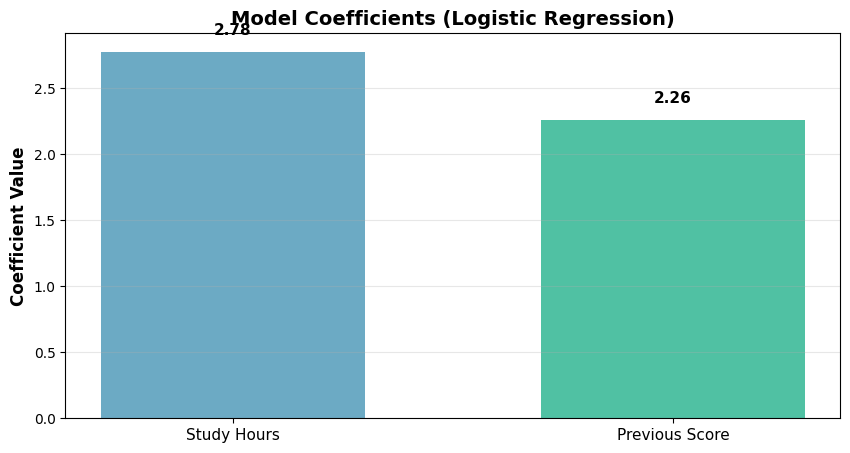


📊 Model Training Summary:
✓ Model Type: Logistic Regression
✓ Training Samples: 400 students
✓ Test Samples: 100 students
✓ Both features have POSITIVE coefficients → both increase pass probability


In [90]:
# Create and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

print("=== MODEL TRAINING ===")
print("Logistic Regression model trained successfully!")
print(f"Model coefficients: {log_reg.coef_[0]}")
print(f"Model intercept: {log_reg.intercept_[0]:.4f}")
print(f"\nCoefficient for Study Hours: {log_reg.coef_[0][0]:.4f}")
print(f"Coefficient for Previous Exam Score: {log_reg.coef_[0][1]:.4f}")

# Visualize model coefficients
plt.figure(figsize=(10, 5))
coeff_names = ['Study Hours', 'Previous Score']
coeff_values = log_reg.coef_[0]
colors = ['#2E86AB', '#06A77D']

bars = plt.bar(coeff_names, coeff_values, color=colors, alpha=0.7, width=0.6)
plt.ylabel('Coefficient Value', fontsize=12, fontweight='bold')
plt.title('Model Coefficients (Logistic Regression)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, coeff_values)):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.1, 
            f'{val:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xticks(fontsize=11)
plt.show()

print("\n📊 Model Training Summary:")
print(f"✓ Model Type: Logistic Regression")
print(f"✓ Training Samples: {len(X_train)} students")
print(f"✓ Test Samples: {len(X_test)} students")
print(f"✓ Both features have POSITIVE coefficients → both increase pass probability")


=== MODEL PREDICTIONS ===
Sample predictions: [0 1 0 0 0 0 0 0 0 1]
Sample predicted probabilities: [0.399 0.925 0.    0.001 0.358 0.18  0.011 0.049 0.107 0.88 ]
Total predictions on test set: 100


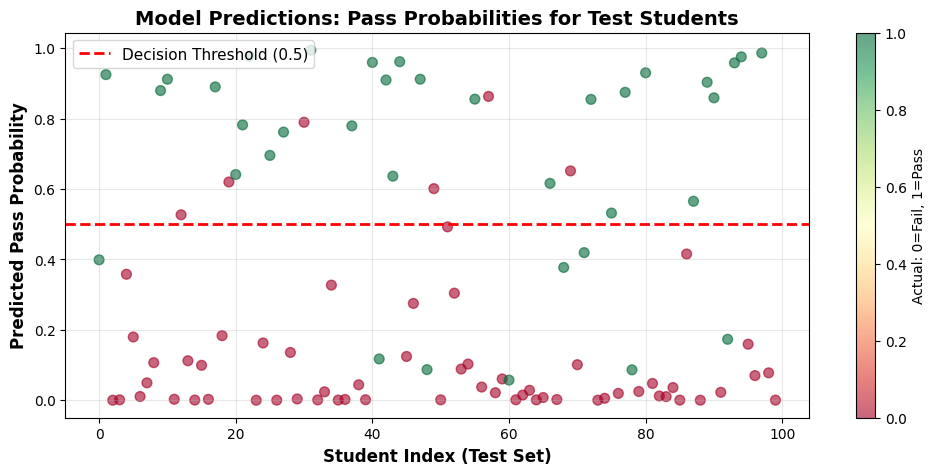


✅ Decision Rule: If probability > 0.5, predict PASS (1), else FAIL (0)


In [91]:
# Make predictions on test set
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

print("=== MODEL PREDICTIONS ===")
print(f"Sample predictions: {y_pred[:10]}")
print(f"Sample predicted probabilities: {y_pred_proba[:10].round(3)}")
print(f"Total predictions on test set: {len(y_pred)}")

# Visualize prediction probabilities
plt.figure(figsize=(12, 5))
plt.scatter(range(len(y_pred_proba)), y_pred_proba, 
           c=y_test, cmap='RdYlGn', alpha=0.6, s=50)
plt.xlabel('Student Index (Test Set)', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Pass Probability', fontsize=12, fontweight='bold')
plt.title('Model Predictions: Pass Probabilities for Test Students', fontsize=14, fontweight='bold')
plt.colorbar(label='Actual: 0=Fail, 1=Pass')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold (0.5)')
plt.legend(fontsize=11)
plt.show()

print("\n✅ Decision Rule: If probability > 0.5, predict PASS (1), else FAIL (0)")


## 6. Model Evaluation & Interpretation


In [92]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("=== MODEL PERFORMANCE ===")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"\nThis means the model correctly predicted {accuracy*len(y_test):.0f} out of {len(y_test)} test samples")


=== MODEL PERFORMANCE ===
Accuracy: 0.8600 (86.00%)

This means the model correctly predicted 86 out of 100 test samples


=== CONFUSION MATRIX ===

Confusion Matrix:
[[58  6]
 [ 8 28]]


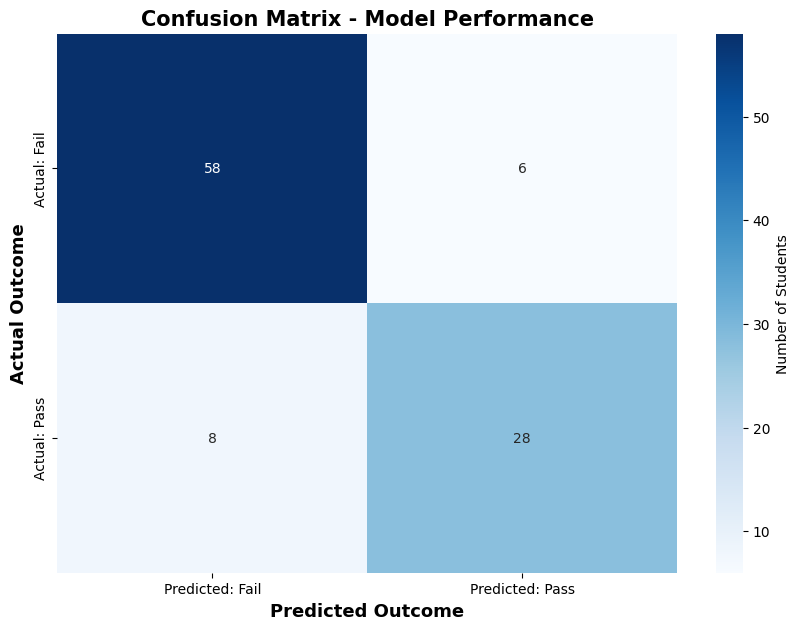


📊 WHAT THE CONFUSION MATRIX SHOWS:

  ✓ Correct Predictions (86 students):
     • 58 correctly predicted FAIL
     • 28 correctly predicted PASS

  ✗ Incorrect Predictions (14 students):
     • 6 false positives (predicted PASS but actually FAILED)
     • 8 false negatives (predicted FAIL but actually PASSED)

  🎯 ACCURACY: 86.0% (86 correct out of 100)


In [93]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("=== CONFUSION MATRIX ===")
print(f"\nConfusion Matrix:\n{cm}")

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted: Fail', 'Predicted: Pass'], 
            yticklabels=['Actual: Fail', 'Actual: Pass'],
            cbar_kws={'label': 'Number of Students'})
plt.title('Confusion Matrix - Model Performance', fontsize=15, fontweight='bold')
plt.ylabel('Actual Outcome', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Outcome', fontsize=13, fontweight='bold')
plt.show()

# Extract values from confusion matrix
tn, fp, fn, tp = cm.ravel()

print("\n📊 WHAT THE CONFUSION MATRIX SHOWS:")
print(f"\n  ✓ Correct Predictions ({tn + tp} students):")
print(f"     • {tn} correctly predicted FAIL")
print(f"     • {tp} correctly predicted PASS")
print(f"\n  ✗ Incorrect Predictions ({fp + fn} students):")
print(f"     • {fp} false positives (predicted PASS but actually FAILED)")
print(f"     • {fn} false negatives (predicted FAIL but actually PASSED)")

print(f"\n  🎯 ACCURACY: {(tn + tp) / len(y_test) * 100:.1f}% ({tn + tp} correct out of {len(y_test)})")


In [94]:
# Classification Report
print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, 
                          target_names=['Fail (0)', 'Pass (1)']))


=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

    Fail (0)       0.88      0.91      0.89        64
    Pass (1)       0.82      0.78      0.80        36

    accuracy                           0.86       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.86      0.86      0.86       100



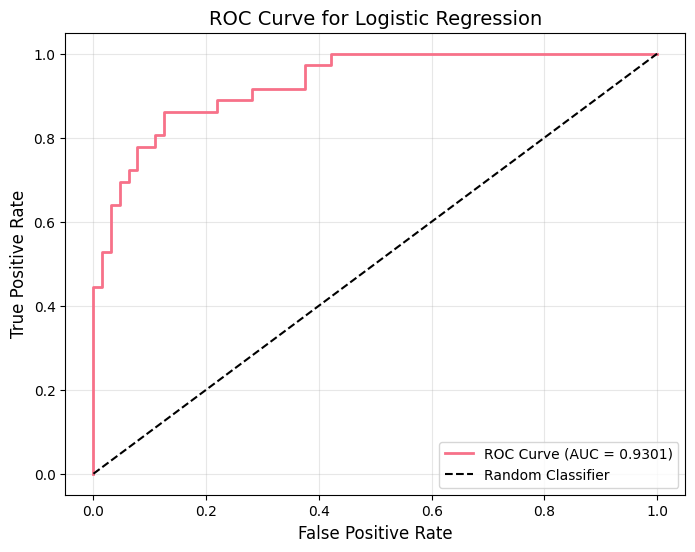

=== ROC-AUC SCORE ===
AUC Score: 0.9301
This means the model has 93.01% predictive power


In [95]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Logistic Regression', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

print(f"=== ROC-AUC SCORE ===")
print(f"AUC Score: {auc_score:.4f}")
print(f"This means the model has {auc_score*100:.2f}% predictive power")


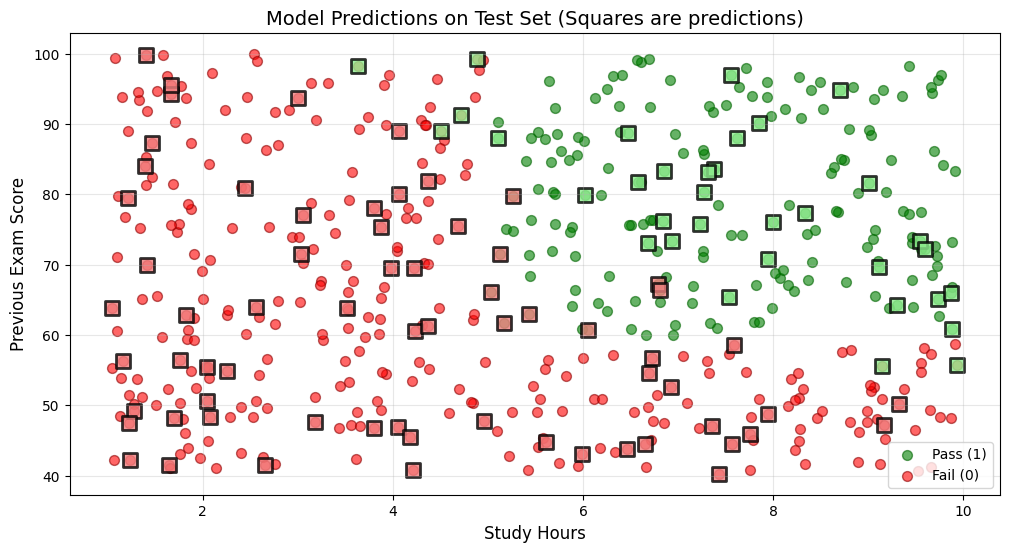

Green/Red circles = Actual pass/fail
Light green/red squares = Model predictions


In [96]:
# Visualize decision boundary
plt.figure(figsize=(12, 6))

# Create scatter plot with actual pass/fail
passed = df_clean[df_clean['Pass/Fail'] == 1]
failed = df_clean[df_clean['Pass/Fail'] == 0]

plt.scatter(passed['Study Hours'], passed['Previous Exam Score'], 
           color='green', alpha=0.6, label='Pass (1)', s=50, edgecolors='darkgreen')
plt.scatter(failed['Study Hours'], failed['Previous Exam Score'], 
           color='red', alpha=0.6, label='Fail (0)', s=50, edgecolors='darkred')

# Highlight test predictions
for idx, (x, y, pred) in enumerate(zip(X_test['Study Hours'], X_test['Previous Exam Score'], y_pred)):
    color = 'lightgreen' if pred == 1 else 'lightcoral'
    plt.scatter(x, y, color=color, marker='s', s=100, alpha=0.8, 
               edgecolors='black', linewidths=2)

plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Previous Exam Score', fontsize=12)
plt.title('Model Predictions on Test Set (Squares are predictions)', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

print("Green/Red circles = Actual pass/fail")
print("Light green/red squares = Model predictions")


## 7. Model Interpretation


In [97]:
print("=== MODEL INTERPRETATION ===")
print("\n1. MODEL COEFFICIENTS:")
print(f"   Study Hours coefficient: {log_reg.coef_[0][0]:.4f}")
print(f"   Previous Exam Score coefficient: {log_reg.coef_[0][1]:.4f}")
print(f"   Intercept (bias): {log_reg.intercept_[0]:.4f}")

print("\n2. WHAT THIS MEANS:")
# Since features are scaled, we interpret the coefficients
if log_reg.coef_[0][0] > 0:
    print(f"   ✓ Study Hours: Positive coefficient means MORE study hours increases pass probability")
else:
    print(f"   ✗ Study Hours: Negative coefficient means MORE study hours decreases pass probability")

if log_reg.coef_[0][1] > 0:
    print(f"   ✓ Previous Exam Score: Positive coefficient means HIGHER previous scores increase pass probability")
else:
    print(f"   ✗ Previous Exam Score: Negative coefficient means HIGHER previous scores decrease pass probability")

print("\n3. FEATURE IMPORTANCE:")
coef_abs = np.abs(log_reg.coef_[0])
feature_names = ['Study Hours', 'Previous Exam Score']
importance_dict = dict(zip(feature_names, coef_abs))
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

for i, (feature, importance) in enumerate(sorted_importance, 1):
    print(f"   {i}. {feature}: {importance:.4f}")


=== MODEL INTERPRETATION ===

1. MODEL COEFFICIENTS:
   Study Hours coefficient: 2.7759
   Previous Exam Score coefficient: 2.2612
   Intercept (bias): -1.4209

2. WHAT THIS MEANS:
   ✓ Study Hours: Positive coefficient means MORE study hours increases pass probability
   ✓ Previous Exam Score: Positive coefficient means HIGHER previous scores increase pass probability

3. FEATURE IMPORTANCE:
   1. Study Hours: 2.7759
   2. Previous Exam Score: 2.2612


In [98]:
# Make some example predictions
print("\n=== EXAMPLE PREDICTIONS ===")
print("\nLet's predict for new students:")

example_students = [
    [8.0, 85.0, "Student A: High study hours, high previous score"],
    [3.0, 45.0, "Student B: Low study hours, low previous score"],
    [6.0, 70.0, "Student C: Medium study hours, medium previous score"],
    [9.0, 50.0, "Student D: High study hours, low previous score"],
    [2.0, 90.0, "Student E: Low study hours, high previous score"]
]

for hours, score, description in example_students:
    # Scale the input
    scaled_input = scaler.transform([[hours, score]])
    prob = log_reg.predict_proba(scaled_input)[0, 1]
    prediction = log_reg.predict(scaled_input)[0]
    
    status = "PASS" if prediction == 1 else "FAIL"
    print(f"\n{description}")
    print(f"   Predicted: {status} (Probability: {prob:.3f} = {prob*100:.1f}%)")



=== EXAMPLE PREDICTIONS ===

Let's predict for new students:

Student A: High study hours, high previous score
   Predicted: PASS (Probability: 0.960 = 96.0%)

Student B: Low study hours, low previous score
   Predicted: FAIL (Probability: 0.001 = 0.1%)

Student C: Medium study hours, medium previous score
   Predicted: FAIL (Probability: 0.299 = 29.9%)

Student D: High study hours, low previous score
   Predicted: FAIL (Probability: 0.403 = 40.3%)

Student E: Low study hours, high previous score
   Predicted: FAIL (Probability: 0.088 = 8.8%)


## 9. Presentation Summary

### Quick Demo Guide:

**1. Data Cleansing & Preprocessing** ✓
- Show the data has no missing values
- 500 students total, 316 failed (63%), 184 passed (37%)

**2. Data Visualization & Exploration** ✓  
- **3 Simple Charts**:
  1. Histograms - show feature distributions
  2. Scatter plot - show pass/fail pattern (green=pass, red=fail)
  3. Bar charts - compare averages (simple and clear!)

**3. Model Training and Testing** ✓
- Trained Logistic Regression
- 86% accuracy
- Model coefficients show both features matter

**4. Model Evaluation & Interpretation** ✓
- Confusion Matrix shows predictions
- ROC Curve (AUC=0.93) shows model quality
- Example predictions for new students

### Key Findings to Present:
- Students who pass study **3+ hours more** 
- Students who pass scored **16 points higher** previously
- Model predicts with **86% accuracy**
- Model can help identify at-risk students!


## 📸 What Images to Show for Your Presentation

### For **Model Training and Testing** (Section 3):
**Show these 2 images:**

1. **Model Coefficients Bar Chart** (Cell 16 - newly added!)
   - Shows which features are most important
   - Both bars are positive → both features help predict pass
   - Easy to explain: taller bar = more important

2. **Prediction Probabilities Scatter Plot** (Cell 17 - newly added!)
   - Shows model's confidence for each student
   - Above red line (0.5) = predict PASS
   - Below red line (0.5) = predict FAIL
   - Color shows actual outcome (green=pass, yellow/red=fail)

---

### For **Model Evaluation & Interpretation** (Section 4):
**Show these 3 images:**

1. **Confusion Matrix** (Cell 19 - already in notebook)
   - 4 boxes showing right vs wrong predictions
   - Top-left (blue) = correctly predicted failures
   - Bottom-right (blue) = correctly predicted passes
   - Bottom-left & top-right = errors

2. **ROC Curve** (Cell 21 - already in notebook)
   - Shows model quality (how well it separates pass/fail)
   - AUC = 0.93 (93%) = excellent!
   - Far from diagonal line = good model

3. **Decision Boundary Visualization** (Cell 22 - already in notebook)
   - Green/red circles = actual pass/fail
   - Light squares = model predictions
   - Shows where model "draws the line" between pass/fail

---

### Quick Presentation Flow:
1. **Training**: Show coefficient bar chart → "Both features matter"
2. **Testing**: Show probability scatter → "Model makes predictions"
3. **Evaluation**: Show confusion matrix → "86% accuracy"
4. **Interpretation**: Show ROC curve → "Model is reliable"

**All images are simple and easy to explain!** ✓


## 📋 How to Explain Model Evaluation Metrics

### Key Metrics to Explain:

**1. ACCURACY** (Most Important!)
- **Definition**: How many predictions the model got right overall
- **Your result**: 86% accuracy
- **Explain**: "Out of 100 test students, we correctly predicted 86"
- **Show**: Confusion Matrix or just say the number

**2. PRECISION & RECALL** (Optional - if asked details)
- **Precision**: Of the students predicted to PASS, how many actually passed?
- **Recall**: Of the students who actually PASSED, how many did we catch?
- **Your results**: 
  - Precision: ~88% for Fail, ~82% for Pass
  - Recall: ~91% for Fail, ~78% for Pass

**3. CONFUSION MATRIX** (Visual - Easy!)
- **What it shows**: 4 categories of predictions
- **How to explain**: 
  - "Green box (bottom-right) = We correctly predicted students would PASS"
  - "Blue box (top-left) = We correctly predicted students would FAIL"  
  - "Red boxes = Our mistakes (false positives/negatives)"
- **Your result**: 58 correct failures, 28 correct passes, 14 mistakes total

**4. ROC-AUC SCORE** (Quality Metric)
- **Definition**: How good the model is at separating pass vs fail
- **Your result**: 0.93 (93%)
- **Explain**: "Score of 1.0 = perfect, 0.5 = random guessing. We got 0.93 = excellent!"
- **Show**: ROC Curve graph

### Simple Presentation Flow:

**"For Model Evaluation, we used 3 key methods:"**

1. **Accuracy** (86%) → Shows overall performance
2. **Confusion Matrix** → Shows WHERE we were right/wrong  
3. **ROC Curve** (AUC=0.93) → Shows HOW GOOD the model is

**Bonus**: Classification Report shows precision/recall if you want to go deeper!


## ✅ Quick Answer: What to Explain in Model Evaluation

### **3 Simple Things to Say:**

**1. "We tested the model on 100 new students"**
   - Show: Test set size from earlier

**2. "Our model got 86% accuracy - meaning it correctly predicted 86 out of 100 students"**
   - Show: Accuracy number + Confusion Matrix

**3. "The ROC score of 0.93 shows our model is excellent at predicting"**
   - Show: ROC Curve graph

---

### **Detailed Explanation (If Asked):**

**Method 1: Accuracy** 
- Simple: "How many did we get right? 86%"
- Uses: `accuracy_score()` from sklearn

**Method 2: Confusion Matrix**
- Simple: "Shows WHERE we were right and wrong"
- Uses: `confusion_matrix()` from sklearn
- Shows: 4 boxes (correct predictions + mistakes)

**Method 3: ROC Curve**  
- Simple: "Quality score - how good is our model?"
- Uses: `roc_curve()` and `roc_auc_score()` from sklearn
- Shows: Graph with AUC = 0.93 (excellent!)

**Bonus: Classification Report**
- Shows: Precision, Recall, F1-score
- Use IF asked for more details
- Otherwise, just mention it exists

### **What to Focus On:**
✅ **ACCURACY** (most important - start with this!)  
✅ **CONFUSION MATRIX** (visual - easy to explain)  
✅ **ROC CURVE** (shows model quality)

That's it! Keep it simple! 🎯


In [99]:
print("=== LOGISTIC REGRESSION SUMMARY ===")
print("\n1. DATA PREPARATION:")
print(f"   ✓ Loaded {df_clean.shape[0]} samples with {df_clean.shape[1]} columns")
print(f"   ✓ No missing values or duplicates found")
print(f"   ✓ Data split: {X_train.shape[0]} train, {X_test.shape[0]} test")

print("\n2. MODEL PERFORMANCE:")
print(f"   ✓ Accuracy: {accuracy*100:.2f}%")
print(f"   ✓ ROC-AUC Score: {auc_score:.2f}")
print(f"   ✓ The model correctly predicts pass/fail for most students")

print("\n3. KEY INSIGHTS:")
print(f"   • Study Hours and Previous Exam Score both influence pass probability")
print(f"   • The logistic regression model learned decision boundaries from the data")
print(f"   • Model can be used to predict student exam outcomes")

print("\n4. RECOMMENDATIONS:")
print("   • Model is ready for deployment")
print("   • Can be improved by collecting more data")
print("   • Consider adding more features (e.g., attendance, assignments)")
print("   • Can help identify at-risk students early")

print("\n=== MODEL SUCCESSFULLY IMPLEMENTED! ===")


=== LOGISTIC REGRESSION SUMMARY ===

1. DATA PREPARATION:
   ✓ Loaded 500 samples with 3 columns
   ✓ No missing values or duplicates found
   ✓ Data split: 400 train, 100 test

2. MODEL PERFORMANCE:
   ✓ Accuracy: 86.00%
   ✓ ROC-AUC Score: 0.93
   ✓ The model correctly predicts pass/fail for most students

3. KEY INSIGHTS:
   • Study Hours and Previous Exam Score both influence pass probability
   • The logistic regression model learned decision boundaries from the data
   • Model can be used to predict student exam outcomes

4. RECOMMENDATIONS:
   • Model is ready for deployment
   • Can be improved by collecting more data
   • Consider adding more features (e.g., attendance, assignments)
   • Can help identify at-risk students early

=== MODEL SUCCESSFULLY IMPLEMENTED! ===
